<h1 style="text-align: center;"> Ester Kitengu | VBD-MODE Interview Exercise </h1>

## 0. Libraries

In this notebook, we will need 2 libraries:
 - `numpy` for easy computation
 - `matplotlib` for plotting figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **1. Tasks**

- **Implement Algorithms 1 and 2**.

**Algorithm 1: RK4 Function**


1. **function** $RK4(f,y_n,t_n,h)$
2.  $~~~k_1 \leftarrow f(t_n, y_n)$
3.  $~~~k_2 \leftarrow f(t_n + \frac{1}{2}h,\, y_n + \frac{1}{2}hk_1)$
4.   $~~~k_3 \leftarrow f(t_n + \frac{1}{2}h,\, y_n + \frac{1}{2}hk_2)$
5.   $~~~k_4 \leftarrow f(t_n + h,\, y_n + hk_3)$
6.   $~~~y_{n+1} \leftarrow y_n + \frac{1}{6}h(k_1 + 2k_2 + 2k_3 + k_4)$
7.   $~~~$**return** $y_{n+1}$
8. **end function**

In [2]:
#Implementation of Algorithm 1 (RK4)
def RK4(f, yn, tn, h):
  k1 = f(tn, yn)
  k2 = f(tn + 0.5 * h, yn + 0.5 * h * k1)
  k3 = f(tn + 0.5 * h, yn + 0.5 * h * k2)
  k4 = f(tn + h, yn + h * k3)

  yn1 = yn + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

  return yn1

**Algorithm 2: f Function**
1.  **function** $f(t_n,y_n,\beta,\delta_E,\mu_E,\delta_J,\mu_J,\alpha,\omega,\mu_A)$
2.  $~~~E \leftarrow y_n[1]$
3.  $~~~J \leftarrow y_n[2]$
4.  $~~~A \leftarrow y_n[3]$
5.  $~~~dE \leftarrow \beta A - \delta_EE - \mu_EE$
6.  $~~~dJ \leftarrow \delta_E E - \delta_JJ - \alpha J^2 - \mu_JJ$
7.  $~~~dA \leftarrow \omega\delta_J J - \mu_A A$
8.  $~~~dy \leftarrow [dE,dJ,dA]$
9.  $~~~$ **return** $dy$
10. **end function**


In [3]:
#Implementation of Algorithm 2 (RK4)
def f(tn, yn, beta, deltaE, muE, deltaJ, muJ, alpha, omega, muA):
  E = yn[0]
  J = yn[1]
  A = yn[2]

  dE = beta * A - deltaE * E - muE * E
  dJ = deltaE * E - deltaJ * J - alpha * (J**2) - muJ * J
  dA = omega * deltaJ * J - muA * A
  dy = np.array([dE, dJ, dA])

  return dy

- **Declare the following variables:$\beta = 24$, $\delta_E = 0.6$, $\mu_E = 0.15$, $\delta_J = 0.08$, $\mu_J = 0.05$, $ \alpha = 0.003 $, $\omega = 0.5$, $\mu_A = 0.1$, $t_0 = 0 $, $t_{\text{end}} = 365$, $h = 0.01$, and the vector $y_0 = [10, 0, 0]$.**

In [4]:
#Declaring variables
beta   = 24
deltaE = 0.6
muE    = 0.15
deltaJ = 0.08
muJ    = 0.05
alpha  = 0.003
omega  = 0.5
muA = 0.1
t0 = 0
tend = 365
h = 0.01
y0 = np.array([10, 0, 0])

- **Create a vector $T$ where the elements follow the pattern $t_0 + h(i − 1)$, where $i$ denotes the position of the element in $T$. Thus, $t_0$ is the first element in $T$, and $t_{end}$ should be the last.**

In [68]:
#Creating vector T
T = [t0]
while T[-1] < tend:
    T.append(t0 + h * (len(T)))
T = np.array(T)
print(f"t0 = {T[0]}, tend ={T[-1]}")

t0 = 0.0, tend =365.0


 - **Create a for-loop which iterates over the integers 1 to $t_{end}/h$, where:**


1. **In the first iteration, call the function $RK4$ (Algorithm 1) with the function $f$ (Algorithm 2), $y_0$, the first element of $T$, and $h$ as input.**
2. **In the second iteration, call the function $RK4$ with the function $f$, the output from $RK4$ in the first iteration, the second element of $T$, and $h$ as input.**
3. **The remaining iterations follow the same pattern.**

- **Save $y_0$ together with the $RK4$ outputs from the for-loop in a new variable $Y$.**

The function $f$ as defined in the algorithm 2 takes in parameteras $t_n, y_n, \beta, \mu_E, \delta_J, \alpha, \omega$ and $\mu_A$. But in to reply the current question, we need $f$ to receive in parameters only $t_n$ and $y_n$. So let's define a new function `new_f` that will take in parameter $t_n$ and $y_n$ and compute $f$ using the parameters defined earlier.

In [7]:
def new_f(tn, yn):
  return f(tn, yn, beta, deltaE, muE, deltaJ, muJ, alpha, omega, muA)

In [52]:
N = int(tend/h)
Y = np.zeros((N,2,3))
for i in range(1, int(tend/h) + 1):
  y = RK4(f=new_f, yn=y0, tn=T[0], h=h) if i == 1 else RK4(f=new_f, yn=y, tn=T[1],h=h)
  Y[i-1, 0, :] = y
  Y[i-1, 1, :] = y0

In [21]:
print(Y.shape)

(36500, 2, 3)


- **Create a plot with three subplots with the following specifications:**



1.  **The first subplot should plot a curve where the x-axis values are given by $T$ and the y-axis values are given by the corresponding first elements of $y_0$ and the $RK4$ outputs. The x- and y-axes should be labeled $“T”$ and $“E”$, respectively.**
2. **The second subplot should plot a curve where the x-axis values are given by $T$ and the y-axis values are given by the corresponding second elements of $y_0$ and the $RK4$ outputs. The x- and y-axes should be labeled $“T”$ and $“J”$, respectively.**
3. **The third subplot should plot a curve where the x-axis values are
 given by $T$ and the $y-axis$ values are given by the corresponding third elements of $y_0$ and the $RK4$ outputs. The x- and y-axes should be labeled $“T”$ and $“A”$, respectively.**

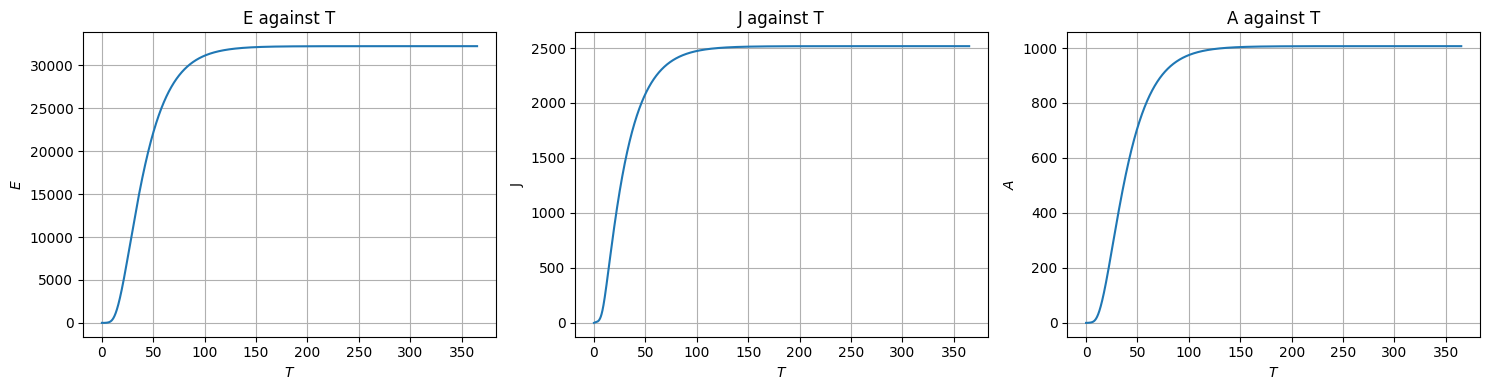

In [49]:
# Create figure
fig, ax = plt.subplots(1,3, figsize=(15,4))

# Create the 1rst subplot
ax[0].plot(T[:-1], Y[:, 0, 0])
ax[0].set_xlabel(r"$T$")
ax[0].set_ylabel(r"$E$")
ax[0].set_title("E against T")
ax[0].grid(True)

# Create the 2nd subplot
ax[1].plot(T[:-1], Y[:, 0, 1])
ax[1].set_xlabel(r"$T$")
ax[1].set_ylabel("J")
ax[1].set_title("J against T")
ax[1].grid(True)

# Create the 3rd subplot
ax[2].plot(T[:-1], Y[:, 0, 2])
ax[2].set_xlabel(r"$T$")
ax[2].set_ylabel(r"$A$")
ax[2].set_title("A against T")
ax[2].grid(True)

plt.tight_layout()
plt.show()